# **Φόρτωση του Wine Dataset**

In [74]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()

# Μετατροπή δεδομένων σε DataFrame για καλύτερη οπτικοποίηση
wine_data = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Σχήμα των δεδομένων
print("Shape:", wine_data.shape)

Shape: (178, 13)


# **Έλεγχος του Dataset**

In [75]:
# Κατηγορίες των κρασιών
print("Wine classes:", wine.target_names)

# Κατηγορίες
print("Categories of samples:", wine.target)

# Σύνδεση χαρακτηριστικών με κατηγορίες και εμφάνιση των 5 πρώτων
wine_data['target'] = wine.target
print(wine_data.head(5))

Wine classes: ['class_0' 'class_1' 'class_2']
Categories of samples: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06              

# **2D Απεικόνιση πριν από την εφαρμογή PCA & LDA**


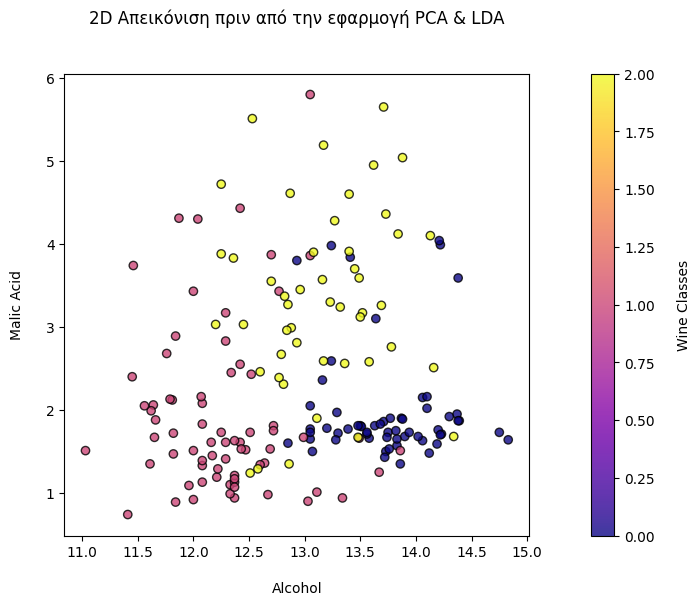

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Δημιουργία του scatter plot
scatter = plt.scatter(wine_data['alcohol'], wine_data['malic_acid'], c=wine.target, cmap='plasma', edgecolors='k', alpha=0.8)

# Προσθήκη τίτλου και ετικετών
plt.title("2D Απεικόνιση πριν από την εφαρμογή PCA & LDA\n\n")
plt.xlabel('\nAlcohol')
plt.ylabel('Malic Acid\n')
plt.colorbar(label='\nWine Classes', pad=0.1)

# Εμφάνιση του διαγράμματος
plt.show()

# **3D Απεικόνιση πριν από την εφαρμοή PCA & LDA**


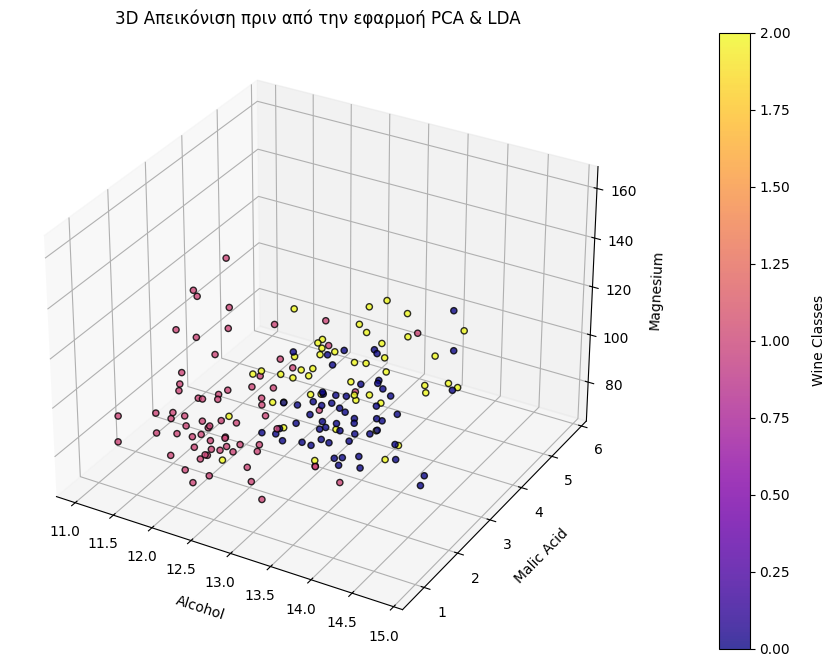

In [77]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Δημιουργία 3D scatter plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Χρήση των δεδομένων 'alcohol', 'malic_acid', 'magnesium' για τους άξονες X, Y, Z
scatter = ax.scatter(wine_data['alcohol'], wine_data['malic_acid'], wine_data['magnesium'], c=wine.target, cmap='plasma', edgecolors='k', alpha=0.8)

# Προσθήκη τίτλου και ετικετών
ax.set_title('3D Απεικόνιση πριν από την εφαρμοή PCA & LDA')
ax.set_xlabel('\nAlcohol')
ax.set_ylabel('\nMalic Acid')
ax.set_zlabel('\nMagnesium')
fig.colorbar(scatter, label='\nWine Classes', pad=0.1)

# Εμφάνιση του διαγράμματος
plt.show()

# **Εφαρμογή PCA με 2D απεικόνιση**


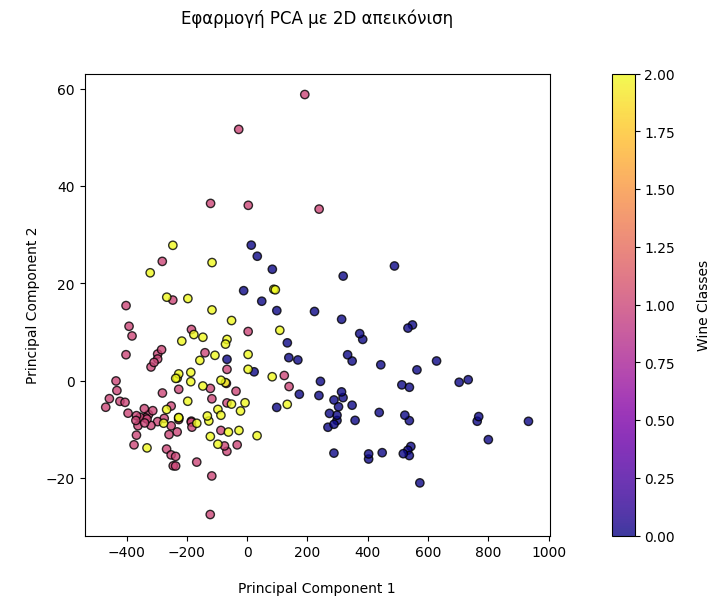

In [78]:
# Εισαγωγή βιβλιοθηκών
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Εφαρμογή PCA για 2 components
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine.data)

# Δημιουργία scatter plot για τα PCA 2D
plt.figure(figsize=(8, 6))
plt.scatter(wine_pca[:, 0], wine_pca[:, 1], c=wine.target, cmap='plasma', edgecolors='k', alpha=0.8)
plt.title("Εφαρμογή PCA με 2D απεικόνιση\n\n")
plt.xlabel("\nPrincipal Component 1")
plt.ylabel("\nPrincipal Component 2")
plt.colorbar(label='\nWine Classes', pad=0.1)
plt.show()


# **Εφαρμογή PCA με 3D απεικόνιση**

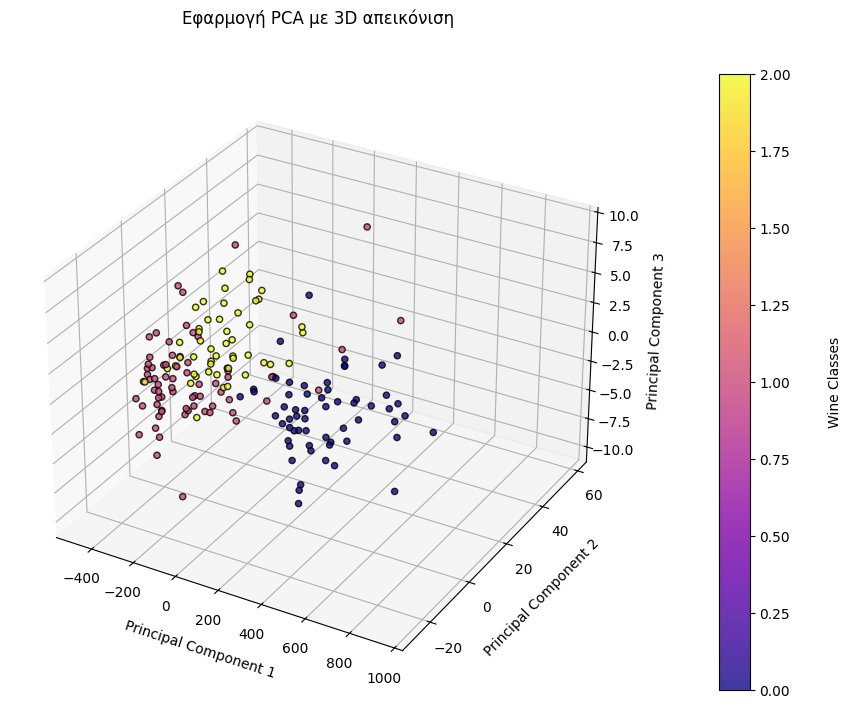

In [79]:
# Εισαγωγή βιβλιοθήκης για 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# Εφαρμογή PCA για 3D
pca = PCA(n_components=3)  # Μείωση διαστάσεων σε 3
wine_pca_3d = pca.fit_transform(wine.data)  # Εφαρμογή PCA στα δεδομένα

# Δημιουργία 3D scatter plot για το PCA
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(wine_pca_3d[:, 0], wine_pca_3d[:, 1], wine_pca_3d[:, 2], c=wine.target, cmap='plasma', edgecolors='k', alpha=0.8)

# Προσθήκη τίτλου και ετικετών
ax.set_title("Εφαρμογή PCA με 3D απεικόνιση\n\n")
ax.set_xlabel("\nPrincipal Component 1")
ax.set_ylabel("\nPrincipal Component 2")
ax.set_zlabel("\nPrincipal Component 3")
fig.colorbar(scatter, label='\n\nWine Classes', pad=0.1)
plt.show()

# **Εφαρμογή LDA με 2D απεικόνιση**

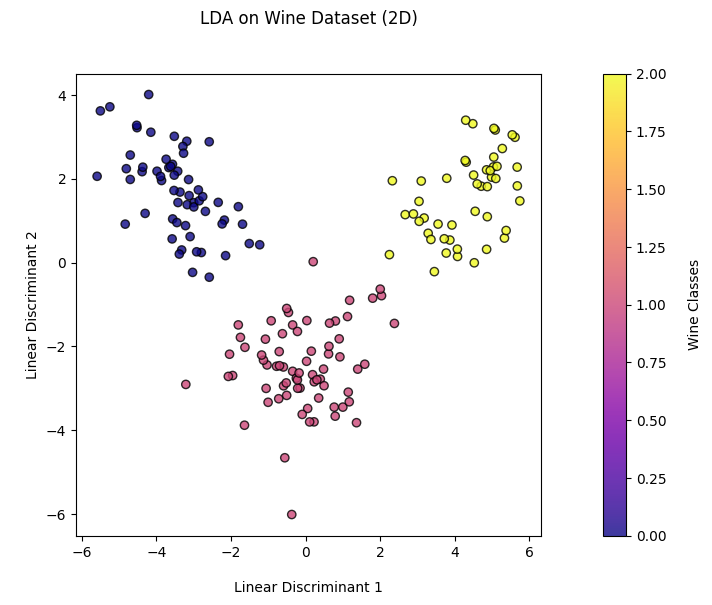

In [80]:
# Εισαγωγή βιβλιοθήκης για το LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Εφαρμογή LDA για 2D (μία συνιστώσα για το LDA)
lda = LinearDiscriminantAnalysis(n_components=2)
wine_lda = lda.fit_transform(wine.data, wine.target)

# Δημιουργία scatter plot για το LDA 2D
plt.figure(figsize=(8, 6))
plt.scatter(wine_lda[:, 0], wine_lda[:, 1], c=wine.target, cmap='plasma', edgecolors='k', alpha=0.8)
plt.title("LDA on Wine Dataset (2D)\n\n")
plt.xlabel("\nLinear Discriminant 1")
plt.ylabel("\nLinear Discriminant 2")
plt.colorbar(label='\nWine Classes', pad=0.1)
plt.show()
